This notebook includes:
- Overlap of datasets
- Effect of MS bias correction
- Performance of PF classifiers
- Analysis of feature correlation and importance
- PTM bar plots

# Import libraries

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import scikitplot as skplt
import seaborn as sns
import sklearn.metrics as metrics

from matplotlib_venn import venn2, venn3 

%matplotlib inline

# Define paths

In [2]:
Data_path = os.path.dirname(os.getcwd()) + '/Data'

# Import datasets

### Feature datasets

In [3]:
df_all = Data_path + '/MachineLearning/training_data.csv' 
df_all = pd.read_csv(df_all, sep=',', engine='python')

df_exo = Data_path + '/MachineLearning/training_data_exo.csv' 
df_exo = pd.read_csv(df_exo, sep=',', engine='python')

df_mv = Data_path + '/MachineLearning/training_data_mv.csv' 
df_mv = pd.read_csv(df_mv, sep=',', engine='python')

df_all_no_filtering = Data_path + '/MachineLearning/training_data_no_filtering.csv' 
df_all_no_filtering = pd.read_csv(df_all_no_filtering, sep=',', engine='python')

### Feature importance

In [4]:
feature_importance_EV = Data_path + '/MachineLearning/Feature_importance_RF_EV.csv' 
feature_importance_EV = pd.read_csv(feature_importance_EV, sep=',', engine='python', header=0, names=["Feature", "EV"], 
                        index_col="Feature")

feature_importance_exo = Data_path + '/MachineLearning/Feature_importance_RF_exo.csv' 
feature_importance_exo = pd.read_csv(feature_importance_exo, sep=',', engine='python', header=0, names=["Feature", "Exosome"], 
                         index_col="Feature")

feature_importance_mv = Data_path + '/MachineLearning/Feature_importance_RF_mv.csv' 
feature_importance_mv = pd.read_csv(feature_importance_mv, sep=',', engine='python', header=0, 
                        names=["Feature", "Microvesicle"], index_col="Feature")

### Test results

In [5]:
test_y_EV = Data_path + '/MachineLearning/test_y_EV.csv' 
test_y_EV = pd.read_csv(test_y_EV, sep=',', engine='python', header=None)
pred_y_all_EV = Data_path + '/MachineLearning/pred_y_all_EV.csv' 
pred_y_all_EV = pd.read_csv(pred_y_all_EV, sep=',', engine='python', header=None)
pred_y_seq_EV = Data_path + '/MachineLearning/pred_y_seq_EV.csv' 
pred_y_seq_EV = pd.read_csv(pred_y_seq_EV, sep=',', engine='python', header=None)


test_y_exo = Data_path + '/MachineLearning/test_y_exo.csv' 
test_y_exo = pd.read_csv(test_y_exo, sep=',', engine='python', header=None)
pred_y_all_exo = Data_path + '/MachineLearning/pred_y_all_exo.csv' 
pred_y_all_exo = pd.read_csv(pred_y_all_exo, sep=',', engine='python', header=None)
pred_y_seq_exo = Data_path + '/MachineLearning/pred_y_seq_exo.csv' 
pred_y_seq_exo = pd.read_csv(pred_y_seq_exo, sep=',', engine='python', header=None)

test_y_mv = Data_path + '/MachineLearning/test_y_mv.csv' 
test_y_mv = pd.read_csv(test_y_mv, sep=',', engine='python', header=None)
pred_y_all_mv = Data_path + '/MachineLearning/pred_y_all_mv.csv' 
pred_y_all_mv = pd.read_csv(pred_y_all_mv, sep=',', engine='python', header=None)
pred_y_seq_mv = Data_path + '/MachineLearning/pred_y_seq_mv.csv' 
pred_y_seq_mv = pd.read_csv(pred_y_seq_mv, sep=',', engine='python', header=None)

### ProteomicsDB evidence information

In [6]:
ProteomicsDB_evidence_negative = pd.read_csv(Data_path + "/Raw/ProteomicsDB/ProteomicsDB_evidence_negative.txt", sep="\n", squeeze=True).tolist()
with open(Data_path + "/Raw/ProteomicsDB/ProteomicsDB_evidence_positive.txt") as f:
    ProteomicsDB_evidence_positive = json.load(f)

### Mass spectrometry dataset

In [7]:
MS_all = pd.read_csv(Data_path + "/Raw/UniProt/MS_proteome_UP_MW.tab", sep="\t")
# remove "," and convert mass column to float
MS_all["Mass"] = MS_all["Mass"].str.replace(',','').astype(float)
MS_all["Mass_log"] = MS_all["Mass"].transform(np.log2)

# Data set overlap

### Overlap between EV groups

In [8]:
# entire data set
EV_set = set(df_all["id"])
Exosome_set = set(df_exo["id"])
MV_set = set(df_mv["id"])

# vesicle associated proteins
EV_1 = set(df_all[df_all["EV"] == 1]["id"])
Exosome_1 = set(df_exo[df_exo["Exosome"] == 1]["id"])
MV_1 = set(df_mv[df_mv["Microvesicle"] == 1]["id"])

# non-vesicle associated proteins
EV_0 = set(df_all[df_all["EV"] == 0]["id"])
Exosome_0 = set(df_exo[df_exo["Exosome"] == 0]["id"])
MV_0 = set(df_mv[df_mv["Microvesicle"] == 0]["id"])

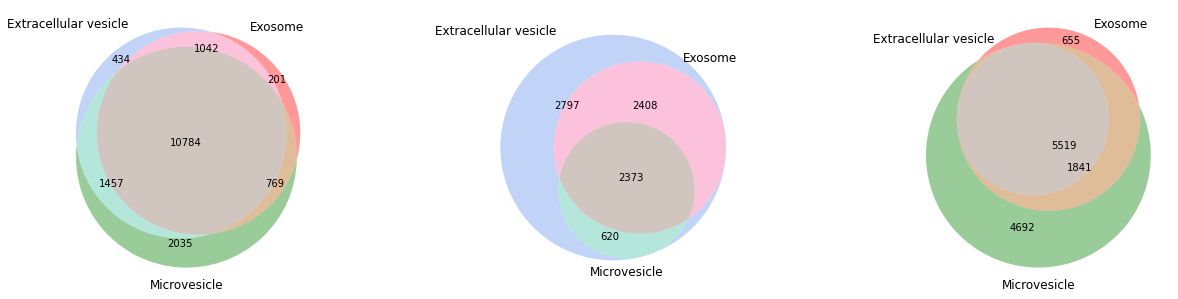

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
colors=("cornflowerblue", "red", "green")
venn3([EV_set, Exosome_set, MV_set], set_labels=('Extracellular vesicle', 'Exosome', 'Microvesicle'), set_colors=colors, 
      ax=ax[0])
ax[0].set_title("", fontdict={'fontsize': 14, 'verticalalignment': "top"})
venn3([EV_1, Exosome_1, MV_1], set_labels=('Extracellular vesicle', 'Exosome', 'Microvesicle'), set_colors=colors, ax=ax[1])
ax[1].set_title("", fontdict={'fontsize': 14, 'verticalalignment': "top"})
venn3([EV_0, Exosome_0, MV_0], set_labels=('Extracellular vesicle', 'Exosome', 'Microvesicle'), set_colors=colors, ax=ax[2])
ax[2].set_title("", fontdict={'fontsize': 14})
fig.subplots_adjust(wspace=0.6)

### Overlap between ProteomicsDB and EV proteins

In [10]:
neg = set(ProteomicsDB_evidence_negative)
pos = set(ProteomicsDB_evidence_positive.keys())
pos_filtered_low = set([k for k, v in ProteomicsDB_evidence_positive.items() if v > 0])
pos_filtered_high = set([k for k, v in ProteomicsDB_evidence_positive.items() if v > 1])

EV_set = set(df_all_no_filtering[df_all_no_filtering["EV"] == 1]["id"])
no_EV_set = set(df_all_no_filtering[df_all_no_filtering["EV"] == 0]["id"])

print("Number of proteins in ProteomicsDB negative set:", len(neg))
print("Number of proteins in ProteomicsDB positive set:", len(pos))
print("Number of proteins in ProteomicsDB positive set with evidence score of 1 or higher:", len(pos_filtered_low))
print("Number of proteins in ProteomicsDB positive set with evidence score of 2:", len(pos_filtered_high))

Number of proteins in ProteomicsDB negative set: 1386
Number of proteins in ProteomicsDB positive set: 18997
Number of proteins in ProteomicsDB positive set with evidence score of 1 or higher: 16791
Number of proteins in ProteomicsDB positive set with evidence score of 2: 16248


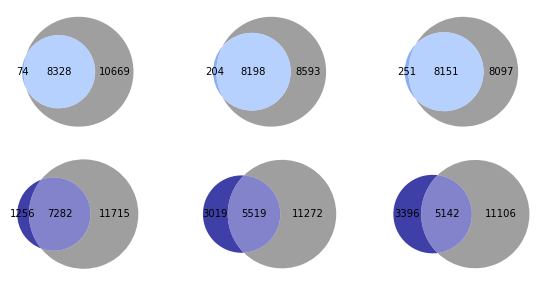

In [11]:
labels = ("", "")
labels_non = ("", "")
colors = ("cornflowerblue", "grey")
colors_non = ("darkblue", "grey")
alpha = 0.75

fig, ax = plt.subplots(2, 3, figsize=(10, 5))
v = venn2([EV_set, pos], set_labels=labels, set_colors=colors, ax=ax[0, 0], alpha=alpha)
# v.get_patch_by_id('10').set_color("#6495ED")
v = venn2([no_EV_set, pos], set_labels=labels_non, set_colors=colors_non, ax=ax[1, 0], alpha=alpha)
# v.get_patch_by_id('10').set_color('navy')
venn2([EV_set, pos_filtered_low], set_labels=labels, set_colors=colors, ax=ax[0, 1], alpha=alpha)
venn2([no_EV_set, pos_filtered_low], set_labels=labels_non, set_colors=colors_non, ax=ax[1, 1], alpha=alpha)
venn2([EV_set, pos_filtered_high], set_labels=labels, set_colors=colors, ax=ax[0, 2], alpha=alpha)
venn2([no_EV_set, pos_filtered_high], set_labels=labels_non, set_colors=colors_non, ax=ax[1, 2], alpha=alpha)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# Mass spectrometry bias removal

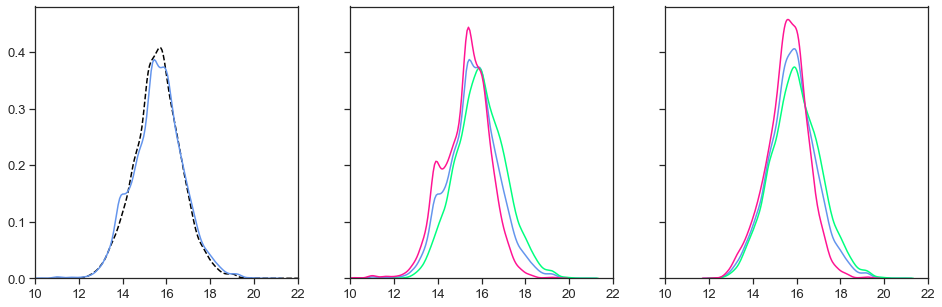

In [12]:
sns.set(style=("ticks"), palette="muted", font_scale=1.2)
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(16, 5))
axs[0].set_xlim([10, 22])

sns.kdeplot(MS_all['Mass_log'], ax=axs[0], color='black', label='MS detectable proteins', linestyle="--")
sns.kdeplot(df_all_no_filtering['molecular_weight'], ax=axs[0], color='cornflowerblue', label='All proteins')
axs[0].set(xlabel=None, ylabel=None, title=None)

sns.kdeplot(df_all_no_filtering['molecular_weight'], ax=axs[1], color='cornflowerblue', label='All proteins')
sns.kdeplot(df_all_no_filtering[df_all_no_filtering["EV"] == 1]['molecular_weight'], ax=axs[1], color="springgreen", 
            label='EV proteins')
sns.kdeplot(df_all_no_filtering[df_all_no_filtering["EV"] == 0]['molecular_weight'], ax=axs[1], color="deeppink", 
            label='Non-EV proteins')
axs[1].set(xlabel=None, ylabel=None, title=None)

sns.kdeplot(df_all['molecular_weight'], ax=axs[2], color='cornflowerblue', label='All proteins')
sns.kdeplot(df_all[df_all["EV"] == 1]['molecular_weight'], ax=axs[2], color="springgreen", label='EV proteins')
sns.kdeplot(df_all[df_all["EV"] == 0]['molecular_weight'], ax=axs[2], color="deeppink", label='Non-EV proteins')
axs[2].set(xlabel=None, ylabel=None, title=None);

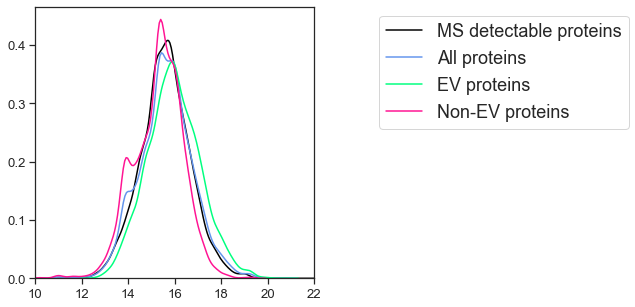

In [13]:
sns.set(style=("ticks"), palette="muted", font_scale=1.2)
fig, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize=(5, 5))
ax.set_xlim([10, 22])

sns.kdeplot(MS_all['Mass_log'], color='black', label='MS detectable proteins')
sns.kdeplot(df_all_no_filtering['molecular_weight'], color='cornflowerblue', label='All proteins')
sns.kdeplot(df_all_no_filtering[df_all_no_filtering["EV"] == 1]['molecular_weight'], color="springgreen", 
            label='EV proteins')
sns.kdeplot(df_all_no_filtering[df_all_no_filtering["EV"] == 0]['molecular_weight'], color="deeppink", 
            label='Non-EV proteins')
ax.set(xlabel=None, ylabel=None, title=None)
ax.legend(bbox_to_anchor=(1.2, 1), prop=dict(size=18));

# Random forest classifier performance

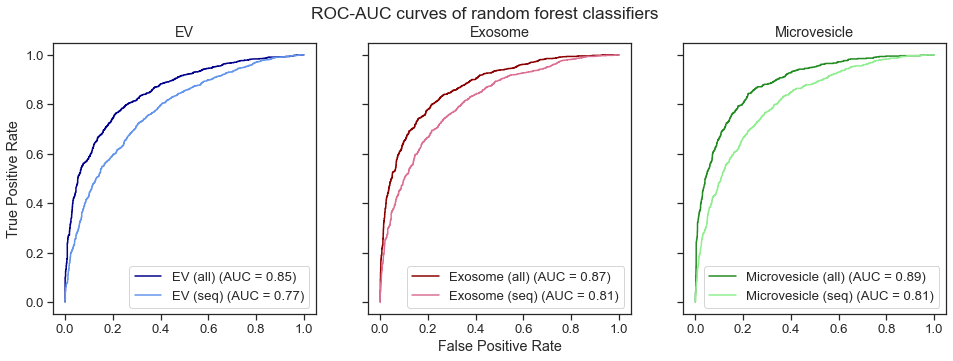

In [14]:
# figure settings
sns.set(style=("ticks"), font_scale=1.2)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

metrics.RocCurveDisplay.from_predictions(test_y_EV, pred_y_all_EV, color='darkblue', name="EV (all)", ax=ax1)
metrics.RocCurveDisplay.from_predictions(test_y_EV, pred_y_seq_EV, color='cornflowerblue', name="EV (seq)", ax=ax1)
ax1.set(xlabel=None, ylabel="True Positive Rate", title="EV")
metrics.RocCurveDisplay.from_predictions(test_y_exo, pred_y_all_exo, color='darkred', name="Exosome (all)", ax=ax2)
metrics.RocCurveDisplay.from_predictions(test_y_exo, pred_y_seq_exo, color='palevioletred', name="Exosome (seq)", ax=ax2)
ax2.set(xlabel="False Positive Rate", ylabel=None, title="Exosome")
metrics.RocCurveDisplay.from_predictions(test_y_mv, pred_y_all_mv, color='forestgreen', name="Microvesicle (all)", ax=ax3)
metrics.RocCurveDisplay.from_predictions(test_y_mv, pred_y_seq_mv, color='lightgreen', name="Microvesicle (seq)", ax=ax3)
ax3.set(xlabel=None, ylabel=None, title="Microvesicle")
fig.suptitle("ROC-AUC curves of random forest classifiers");

# Feature correlation & importance

In [15]:
# # rename columns for figure, mark annotations
# idx = {'Palmitoylation_all':'Palmitoylation¹', 
#                   'PTM_UP':'PTM¹', 
#                   'molecular_weight':'Molecular weight',
#                   'Instability_index':'Instability index',
#                   'length':'Sequence length', 
#                   'turn':'Turn', 
#                   'Acetylation_all':'Acetylation¹',
#                   'tasa_netsurfp2':'TASA', 
#                   'thsa_netsurfp2':'THSA',
#                   'disorder':'Disorder', 
#                   'D_exposed':'Exposed D', 
#                   'Ubiquitination_all':'Ubiquitination¹', 
#                   'sheet':'Sheet', 
#                   'Sum_AA_exposed': 'Exposed amino acids', 
#                   'S_exposed':'Exposed S', 
#                   'Aggregation_propensity':'Aggregation propensity',
#                   'L_exposed':'Exposed L', 
#                   'rhsa_netsurfp2':'RHSA', 
#                   'isoelectric_point':'Isoelectric point', 
#                   'charge_at_7':'Charge at pH 7',
#                   'on_surface': 'Hydrophobic AAs on surface', 
#                   'Methylation_all':'Methylation¹', 
#                   'charge_at_5':'Charge at pH 5', 
#                   'helix':'Helix',
#                   'hydr_count':'Hydrophobic amino acids', 
#                   'G_exposed':'Exposed G', 
#                   'H_exposed':'Exposed H',
#                   'Q_exposed':'Exposed Q', 
#                   'N_exposed':'Exposed N', 
#                   'C_exposed':'Exposed C', 
#                   'A_exposed':'Exposed A', 
#                   'K_exposed':'Exposed K', 
#                   'V_exposed':'Exposed V', 
#                   'E_exposed':'Exposed E', 
#                   'M_exposed':'Exposed M', 
#                   'T_exposed':'Exposed T', 
#                   'Glycosylation_all':'Glycosylation¹', 
#                   'R_exposed':'Exposed R', 
#                   'P_exposed':'Exposed P', 
#                   'Y_exposed':'Exposed Y',
#                   'polar_count':'Polar amino acids', 
#                   'F_exposed':'Exposed F', 
#                   'I_exposed':'Exposed I', 
#                   'Nitrosylation_all':'Nitrosylation¹',
#                   'W_exposed':'Exposed W', 
#                   'Acetylation_MSD':'Acetylation predicted', 
#                   'Phosphorylation_all':'Phosphorylation¹', 
#                   'transmembrane':'Transmembrane',
#                   'SUMOylation_MSD':'SUMOylation predicted', 
#                   'Methylation_MSD':'Methylation predicted', 
#                   'Palmitoylation_MSD':'Palmitoylation predicted', 
#                   'coiled_coil': 'Coiled coil domain', 
#                   'Lipoprotein_UP':'Lipoprotein¹', 
#                   'Glycosylation_MSD':'Glycosylation predicted',
#                   'SUMOylation_all':'SUMOylation¹',
#                   'Phosphorylation_MSD':'Phosphorylation predicted',
#                   'Ubiquitination_MSD':'Ubiquitination predicted',
#                   'PTM_MSD':'PTM predicted',
#                   'Myristoylation_all':'Myristoylation¹', 
#                   'Prenylation_UP':'Prenylation¹', 
#                   'GPI-anchor_UP':'GPI-anchor¹', 
#                   'ww_domain':'WW domain',
#                   'NEDDylation_UP':'NEDDylation¹', 
#                   'RAS_profile':'RAS profile', 
#                   'Citrullination_UP':'Citrullination¹', 
#                   'Nitration_UP':'Nitration¹',
#                   'ISGylation_UP':'ISGylation¹',
#                   'HSP':'HSP¹',
#                   'Polar_exposed':'Exposed polar AAs',
#                   'Hydrophobic_exposed':'Exposed hydrophobic AAs'}

# df_all_renamed = df_all.rename(columns=idx)
# df_exo_renamed = df_exo.rename(columns=idx)
# df_mv_renamed = df_mv.rename(columns=idx)

In [16]:
# create pairwise feature correlation
corr_all = df_all.corr()
corr_exo = df_exo.corr()
corr_mv = df_mv.corr()

In [17]:
df_corr = corr_all[['EV']]
df_corr = df_corr.merge(corr_exo[['Exosome']], left_index=True, right_index=True)
df_corr = df_corr.merge(corr_mv[['Microvesicle']], left_index=True, right_index=True)
df_corr
# df_corr_sorted = df_corr.sort_values("EV", ascending=False)
# df_corr_sorted

,EV,Exosome,Microvesicle
length,0.182096,0.223680,0.017744
hydr_count,0.029187,-0.003808,0.047661
polar_count,0.050408,0.058006,0.073566
molecular_weight,0.181398,0.221658,0.018181
helix,0.036455,0.025479,0.088632
...,...,...,...
ww_domain,0.020554,0.026973,0.006285
transmembrane,0.014043,-0.011611,-0.005147
TMHMM,-0.017632,-0.050122,-0.053603
Polar_exposed,0.164979,0.188714,0.197471


In [18]:
# create data frame of all feature importances
FI = feature_importance_EV
FI = FI.merge(feature_importance_exo, on="Feature")
FI = FI.merge(feature_importance_mv, on="Feature")
FI

,EV,Exosome,Microvesicle
Feature,,,
length,0.022186,0.022115,0.010571
hydr_count,0.013570,0.011666,0.012867
polar_count,0.010774,0.010156,0.009581
molecular_weight,0.023191,0.022301,0.010633
helix,0.012685,0.011751,0.012055
...,...,...,...
ww_domain,0.000152,0.000200,0.000108
transmembrane,0.001563,0.001270,0.001526
TMHMM,0.001333,0.000993,0.000975


In [19]:
# rename columns for figure, mark annotations
idx = {'Palmitoylation_all':'Palmitoylation¹', 
                  'PTM_UP':'PTM¹', 
                  'molecular_weight':'Molecular weight',
                  'Instability_index':'Instability index',
                  'length':'Sequence length', 
                  'turn':'Turn', 
                  'Acetylation_all':'Acetylation¹',
                  'tasa_netsurfp2':'TASA', 
                  'thsa_netsurfp2':'THSA',
                  'disorder':'Disorder', 
                  'D_exposed':'Exposed D', 
                  'Ubiquitination_all':'Ubiquitination¹', 
                  'sheet':'Sheet', 
                  'Sum_AA_exposed': 'Exposed amino acids', 
                  'S_exposed':'Exposed S', 
                  'Aggregation_propensity':'Aggregation propensity',
                  'L_exposed':'Exposed L', 
                  'rhsa_netsurfp2':'RHSA', 
                  'isoelectric_point':'Isoelectric point', 
                  'charge_at_7':'Charge at pH 7',
                  'on_surface': 'Hydrophobic AAs on surface', 
                  'Methylation_all':'Methylation¹', 
                  'charge_at_5':'Charge at pH 5', 
                  'helix':'Helix',
                  'hydr_count':'Hydrophobic amino acids', 
                  'G_exposed':'Exposed G', 
                  'H_exposed':'Exposed H',
                  'Q_exposed':'Exposed Q', 
                  'N_exposed':'Exposed N', 
                  'C_exposed':'Exposed C', 
                  'A_exposed':'Exposed A', 
                  'K_exposed':'Exposed K', 
                  'V_exposed':'Exposed V', 
                  'E_exposed':'Exposed E', 
                  'M_exposed':'Exposed M', 
                  'T_exposed':'Exposed T', 
                  'Glycosylation_all':'Glycosylation¹', 
                  'R_exposed':'Exposed R', 
                  'P_exposed':'Exposed P', 
                  'Y_exposed':'Exposed Y',
                  'polar_count':'Polar amino acids', 
                  'F_exposed':'Exposed F', 
                  'I_exposed':'Exposed I', 
                  'Nitrosylation_all':'Nitrosylation¹',
                  'W_exposed':'Exposed W', 
                  'Acetylation_MSD':'Acetylation predicted', 
                  'Phosphorylation_all':'Phosphorylation¹', 
                  'transmembrane':'Transmembrane',
                  'SUMOylation_MSD':'SUMOylation predicted', 
                  'Methylation_MSD':'Methylation predicted', 
                  'Palmitoylation_MSD':'Palmitoylation predicted', 
                  'coiled_coil': 'Coiled coil domain', 
                  'Lipoprotein_UP':'Lipoprotein¹', 
                  'Glycosylation_MSD':'Glycosylation predicted',
                  'SUMOylation_all':'SUMOylation¹',
                  'Phosphorylation_MSD':'Phosphorylation predicted',
                  'Ubiquitination_MSD':'Ubiquitination predicted',
                  'PTM_MSD':'PTM predicted',
                  'Myristoylation_all':'Myristoylation¹', 
                  'Prenylation_UP':'Prenylation¹', 
                  'GPI-anchor_UP':'GPI-anchor¹', 
                  'ww_domain':'WW domain',
                  'NEDDylation_UP':'NEDDylation¹', 
                  'RAS_profile':'RAS profile', 
                  'Citrullination_UP':'Citrullination¹', 
                  'Nitration_UP':'Nitration¹',
                  'ISGylation_UP':'ISGylation¹',
                  'HSP':'HSP¹',
                  'Polar_exposed':'Exposed polar AAs',
                  'Hydrophobic_exposed':'Exposed hydrophobic AAs'}

# rename datasets
FI_renamed = FI.rename(index=idx)
df_corr_renamed = df_corr.rename(index=idx)

In [20]:
# sort data frames by EV importance/correlation
FI_renamed_sorted = FI_renamed.sort_values("EV", ascending=False)
df_corr_sorted = df_corr_renamed.sort_values("EV", ascending=False)

In [21]:
# create data frame of all feature importance ranks
FI_rank = FI_renamed_sorted.copy()
FI_rank["EV"] = FI_renamed_sorted["EV"].rank()
FI_rank["Exosome"] = FI_renamed_sorted["Exosome"].rank()
FI_rank["Microvesicle"] = FI_renamed_sorted["Microvesicle"].rank()
FI_rank

,EV,Exosome,Microvesicle
Feature,,,
Palmitoylation¹,94.0,94.0,94.0
PTM¹,93.0,93.0,91.0
Acetylation¹,92.0,92.0,93.0
Molecular weight,91.0,91.0,51.0
Sequence length,90.0,90.0,49.0
...,...,...,...
RAS profile,5.0,6.0,5.0
NEDDylation¹,4.0,3.0,4.0
Citrullination¹,3.0,4.0,1.0


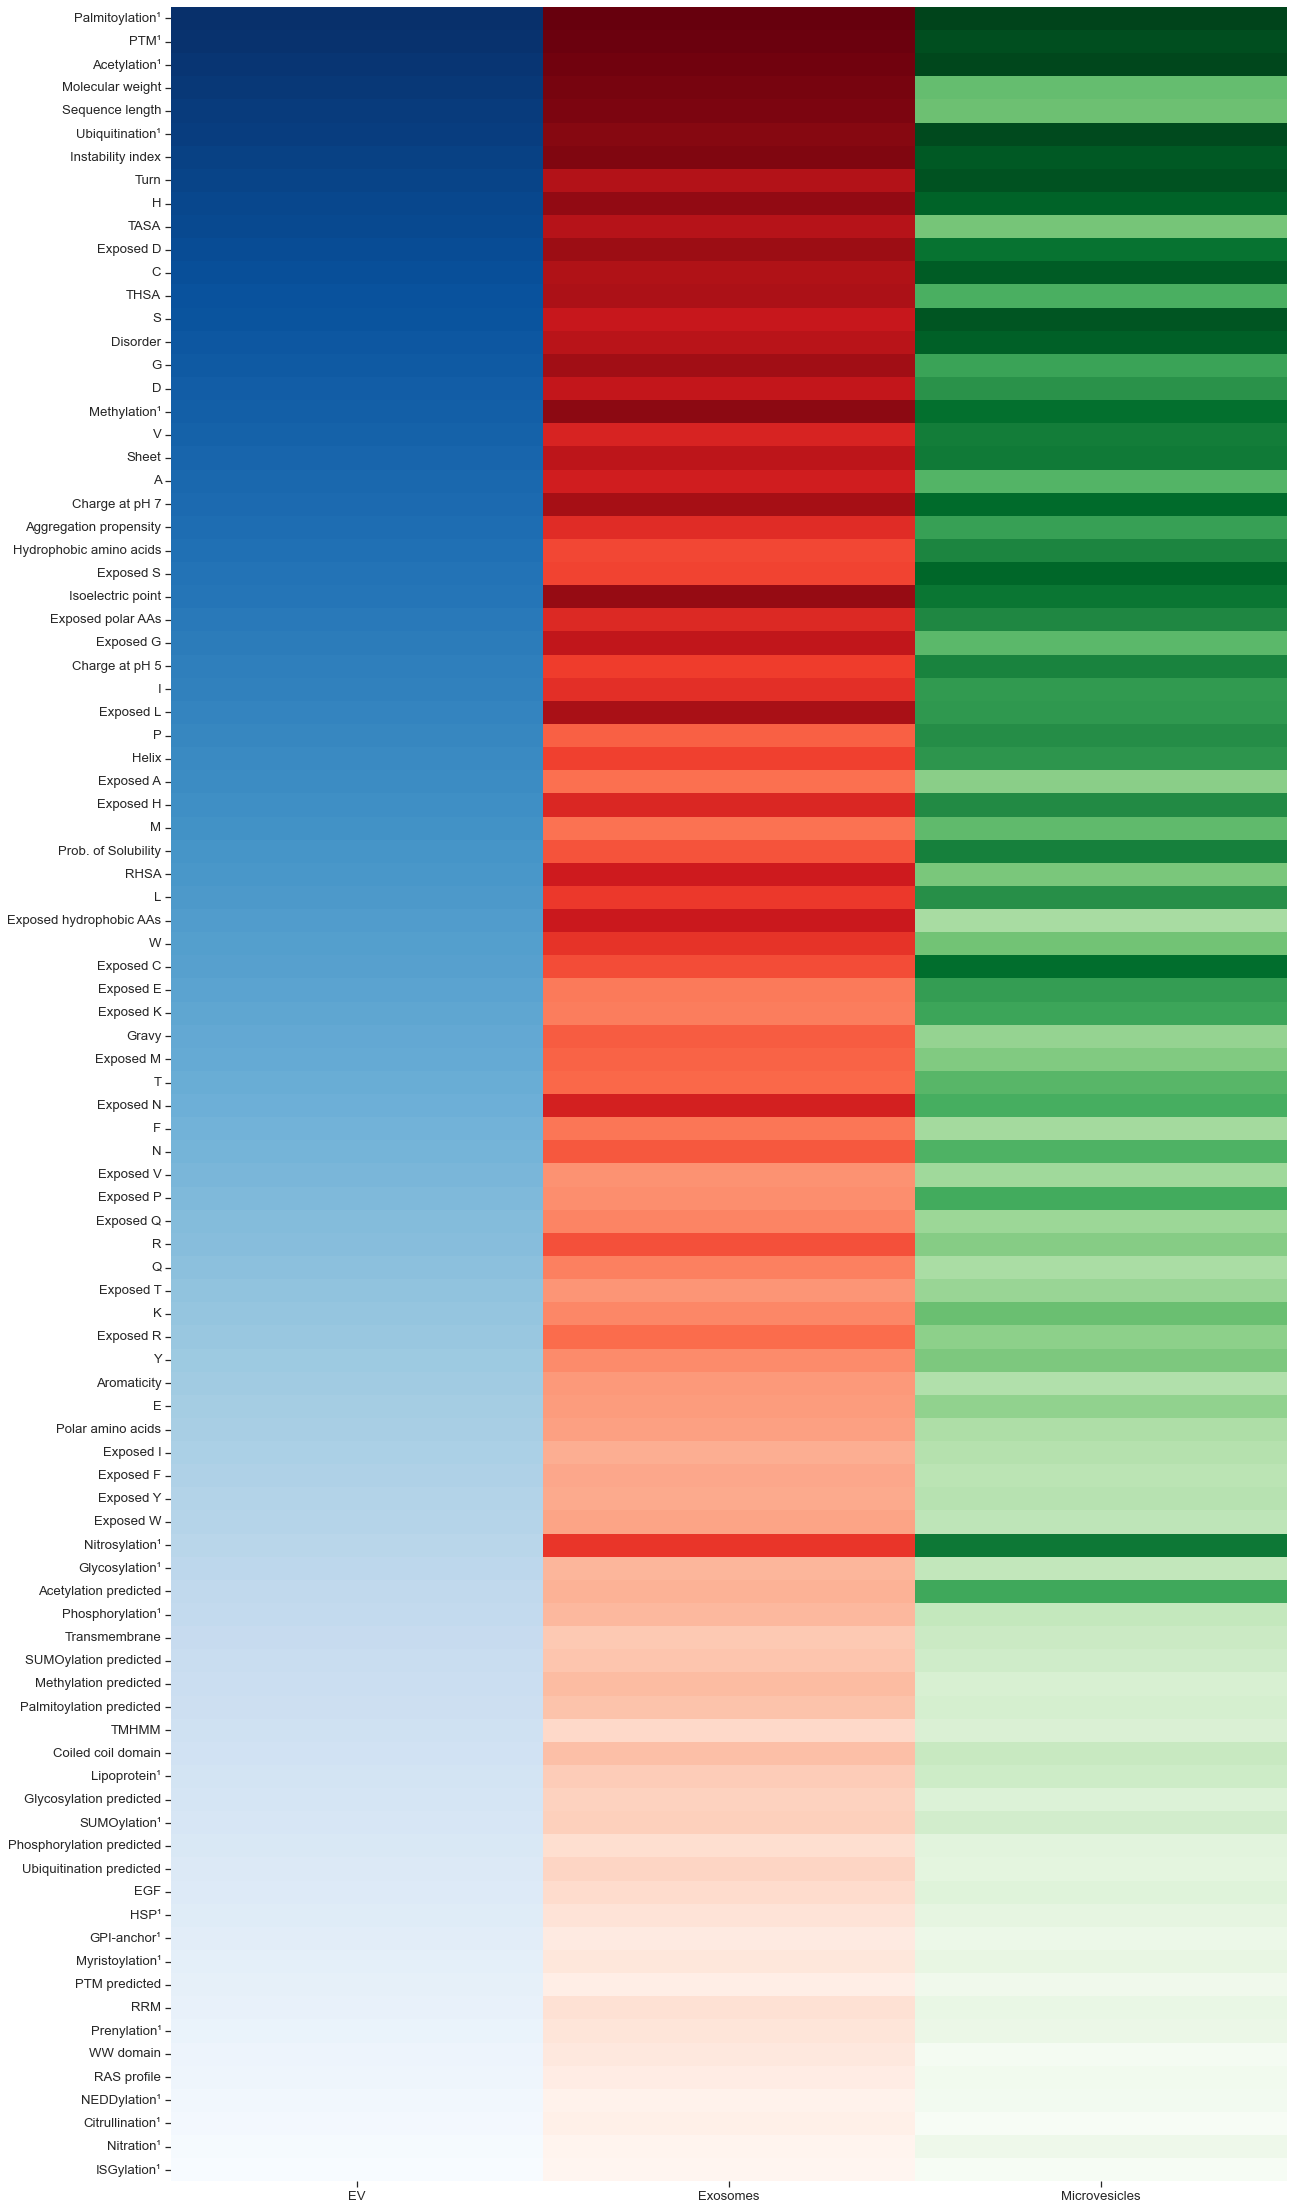

In [22]:
cm = ['Blues', 'Reds', 'Greens']
fig, axs = plt.subplots(1, FI_rank.columns.size, gridspec_kw={'wspace': 0}, figsize=(20, 40))
classes = [["EV"], ["Exosomes"], ["Microvesicles"]]

for i, (s, a, c) in enumerate(zip(FI_rank.columns, axs, cm)):
    sns.heatmap(np.array([FI_rank[s].values]).T, yticklabels=FI_rank.index, xticklabels=classes[i], fmt='.2f', 
        ax=a, cmap=c, cbar=False)
    a.xaxis.set()
    if i>0:
        a.yaxis.set_ticks([])

In [23]:
# include only top 20 features
FI_top = FI_renamed_sorted[:20]
FI_top = FI_top.rename_axis('Feature').reset_index()
FI_top

,Feature,EV,Exosome,Microvesicle
0,Palmitoylation¹,0.051165,0.067612,0.091040
1,PTM¹,0.027044,0.033412,0.027286
2,Acetylation¹,0.024288,0.022385,0.034437
3,Molecular weight,0.023191,0.022301,0.010633
4,Sequence length,0.022186,0.022115,0.010571
5,Ubiquitination¹,0.022091,0.020037,0.027489
6,Instability index,0.021265,0.021742,0.024177
7,Turn,0.019463,0.015585,0.025748
8,H,0.018271,0.018631,0.018645
9,TASA,0.017949,0.015429,0.010450


In [24]:
# create melted data frame
df_FI_top_melted = FI_top.melt(id_vars=['Feature'], value_vars=['EV', 'Exosome', 'Microvesicle'], 
    var_name="Vesicle", value_name="Importance")
df_FI_top_melted

,Feature,Vesicle,Importance
0,Palmitoylation¹,EV,0.051165
1,PTM¹,EV,0.027044
2,Acetylation¹,EV,0.024288
3,Molecular weight,EV,0.023191
4,Sequence length,EV,0.022186
5,Ubiquitination¹,EV,0.022091
6,Instability index,EV,0.021265
7,Turn,EV,0.019463
8,H,EV,0.018271
9,TASA,EV,0.017949


In [25]:
# change order of correlation values to feature importance ranking
correlation_top = df_corr_renamed.reindex(FI_renamed_sorted.index)
# reindex
correlation_top = correlation_top.rename_axis('Feature').reset_index()[:20]
correlation_top

,Feature,EV,Exosome,Microvesicle
0,Palmitoylation¹,0.331787,0.413949,0.459819
1,PTM¹,0.294249,0.294125,0.206389
2,Acetylation¹,0.264372,0.300901,0.279361
3,Molecular weight,0.181398,0.221658,0.018181
4,Sequence length,0.182096,0.223680,0.017744
5,Ubiquitination¹,0.269004,0.267553,0.237876
6,Instability index,-0.171227,-0.181272,-0.204146
7,Turn,-0.134503,-0.128089,-0.190004
8,H,-0.162803,-0.155502,-0.147031
9,TASA,0.133764,0.169279,-0.036915


In [26]:
correlation_top_melted = correlation_top.melt(id_vars=['Feature'], value_vars=['EV', 'Exosome', 'Microvesicle'], 
    var_name="Vesicle", value_name="Importance")

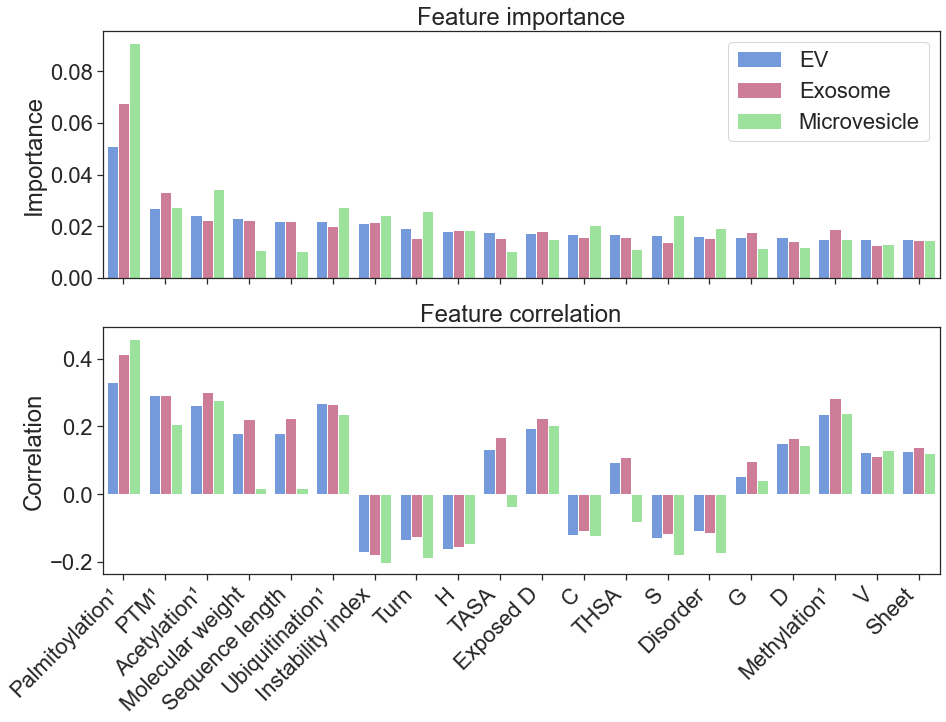

In [27]:
sns.set(style=("ticks"), font_scale=2)
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.2)

# set colors for vesicle types
palette = {"EV": "cornflowerblue", "Exosome": "palevioletred", "Microvesicle": "lightgreen"}

# plot feature importance (top 20)
bar = sns.barplot(x="Feature", y="Importance", data=df_FI_top_melted, hue="Vesicle", palette=palette, ax= axs[0])
bar.legend(title="")
bar.set(xlabel=None, ylabel="Importance", title="Feature importance", xticklabels=[])

# # set colors for vesicle types
# palette = {"EV": "darkblue", "Exosome": "darkred", "Microvesicle": "forestgreen"}

# plot correspongin correlation
bar = sns.barplot(x="Feature", y="Importance", data=correlation_top_melted, hue="Vesicle", palette=palette, ax= axs[1])
bar.legend()
bar.set(xlabel=None, ylabel="Correlation", title="Feature correlation")
# plt.xticks(labels=df_FI_top_melted["Feature"][:20], ticks=range(20), rotation=20)
axs[1].set_xticklabels(correlation_top_melted["Feature"][:20], rotation = 45, ha="right");
axs[1].get_legend().remove()

# PTM bar plots

In [28]:
# create dataframes of just the major PTM annotations and predictions
# PTM count, Acetylation, Glycosylation, Methylation, Phosphorylation, Palmitoylation, Ubiquitination, SUMOylation

PTM_columns = ['PTM_UP', 'Acetylation_all', 'Glycosylation_all', 'Methylation_all', 'Palmitoylation_all',
               'Phosphorylation_all', 'Ubiquitination_all', 'SUMOylation_all', 'Nitrosylation_all']

PTM_pred_columns = ['PTM_MSD', 'Acetylation_MSD', 'Glycosylation_MSD', 'Methylation_MSD', 'Palmitoylation_MSD', 
                   'Phosphorylation_MSD',  'Ubiquitination_MSD', 'SUMOylation_MSD']
                    
df_all_PTM = df_all[PTM_columns + ['EV']]
df_exo_PTM = df_exo[PTM_columns + ['Exosome']]
df_mv_PTM = df_mv[PTM_columns + ['Microvesicle']]

In [29]:
# create subsets of PTM dataframe
df_all_PTM_1 = df_all_PTM[df_all_PTM["EV"] == 1]
df_all_PTM_0 = df_all_PTM[df_all_PTM["EV"] == 0]

df_exo_PTM_1 = df_exo_PTM[df_exo_PTM["Exosome"] == 1]
df_exo_PTM_0 = df_exo_PTM[df_exo_PTM["Exosome"] == 0]

df_mv_PTM_1 = df_mv_PTM[df_mv_PTM["Microvesicle"] == 1]
df_mv_PTM_0 = df_mv_PTM[df_mv_PTM["Microvesicle"] == 0]

# drop vesicle columns
df_all_PTM_1 = df_all_PTM_1.drop(columns=["EV"])
df_all_PTM_0 = df_all_PTM_0.drop(columns=["EV"])
df_exo_PTM_1 = df_exo_PTM_1.drop(columns=["Exosome"])
df_exo_PTM_0 = df_exo_PTM_0.drop(columns=["Exosome"])
df_mv_PTM_1 = df_mv_PTM_1.drop(columns=["Microvesicle"])
df_mv_PTM_0 = df_mv_PTM_0.drop(columns=["Microvesicle"])

In [30]:
# create EV results dataframes
df_all_PTM_fraction = pd.DataFrame(data={'PTM': df_all_PTM_1.columns, 
                              'EV':df_all_PTM_1.sum().values/len(df_all_PTM_1), 
                              'non-EV':df_all_PTM_0.sum().values/len(df_all_PTM_0)})
df_all_PTM_fraction = df_all_PTM_fraction.melt(id_vars=['PTM'], var_name="Vesicle", value_name="Fraction")
df_all_PTM_fraction = df_all_PTM_fraction.sort_values(["PTM", "Vesicle"])

df_all_PTM_count = pd.DataFrame(data={'PTM': df_all_PTM_1.columns, 
                              'EV':df_all_PTM_1.sum().values, 
                              'non-EV':df_all_PTM_0.sum().values})
df_all_PTM_count = df_all_PTM_count.melt(id_vars=['PTM'], var_name="Vesicle", value_name="Count")
df_all_PTM_count = df_all_PTM_count.sort_values(["PTM", "Vesicle"])

df_all_PTM_combined = df_all_PTM_fraction.merge(df_all_PTM_count[["Count"]], left_index=True, right_index=True)
df_all_PTM_combined['Count'] = df_all_PTM_combined['Count'].astype(int)

In [31]:
# create exosome results dataframes
df_exo_PTM_fraction = pd.DataFrame(data={'PTM': df_all_PTM_1.columns,  
                              'Exosome':df_exo_PTM_1.sum().values/len(df_exo_PTM_1),
                              'non-Exosome':df_exo_PTM_0.sum().values/len(df_exo_PTM_0)})
df_exo_PTM_fraction = df_exo_PTM_fraction.melt(id_vars=['PTM'], var_name="Vesicle", value_name="Fraction")
df_exo_PTM_fraction = df_exo_PTM_fraction.sort_values(["PTM", "Vesicle"])

df_exo_PTM_count = pd.DataFrame(data={'PTM': df_all_PTM_1.columns, 
                              'Exosome':df_exo_PTM_1.sum().values,
                              'non-Exosome':df_exo_PTM_0.sum().values})
df_exo_PTM_count = df_exo_PTM_count.melt(id_vars=['PTM'], var_name="Vesicle", value_name="Count")
df_exo_PTM_count = df_exo_PTM_count.sort_values(["PTM", "Vesicle"])

df_exo_PTM_combined = df_exo_PTM_fraction.merge(df_exo_PTM_count[["Count"]], left_index=True, right_index=True)
df_exo_PTM_combined['Count'] = df_exo_PTM_combined['Count'].astype(int)

In [32]:
# create microvescicle dataframes
df_mv_PTM_fraction = pd.DataFrame(data={'PTM': df_all_PTM_1.columns, 
                              'Microvesicle':df_mv_PTM_1.sum().values/len(df_mv_PTM_1),
                              'non-Microvesicle':df_mv_PTM_0.sum().values/len(df_mv_PTM_0)})
df_mv_PTM_fraction = df_mv_PTM_fraction.melt(id_vars=['PTM'], var_name="Vesicle", value_name="Fraction")
df_mv_PTM_fraction = df_mv_PTM_fraction.sort_values(["PTM", "Vesicle"])
df_mv_PTM_fraction

df_mv_PTM_count = pd.DataFrame(data={'PTM': df_all_PTM_1.columns, 
                              'Microvesicle':df_mv_PTM_1.sum().values,
                              'non-Microvesicle':df_mv_PTM_0.sum().values})
df_mv_PTM_count = df_mv_PTM_count.melt(id_vars=['PTM'], var_name="Vesicle", value_name="Count")
df_mv_PTM_count = df_mv_PTM_count.sort_values(["PTM", "Vesicle"])

df_mv_PTM_combined = df_mv_PTM_fraction.merge(df_mv_PTM_count[["Count"]], left_index=True, right_index=True)
df_mv_PTM_combined['Count'] = df_mv_PTM_combined['Count'].astype(int)

In [33]:
# combine results dataframes for one PTM type
def create_subset(PTM, EV_set, exo_set, mv_set):
    # subset dataframes
    EV_subset = EV_set[EV_set["PTM"].str.contains(PTM)]
    exo_subset = exo_set[exo_set["PTM"].str.contains(PTM)]
    mv_subset = mv_set[mv_set["PTM"].str.contains(PTM)]
    
    # concatenate into one dataframe
    subset = pd.concat([EV_subset, exo_subset, mv_subset])
    
    return subset

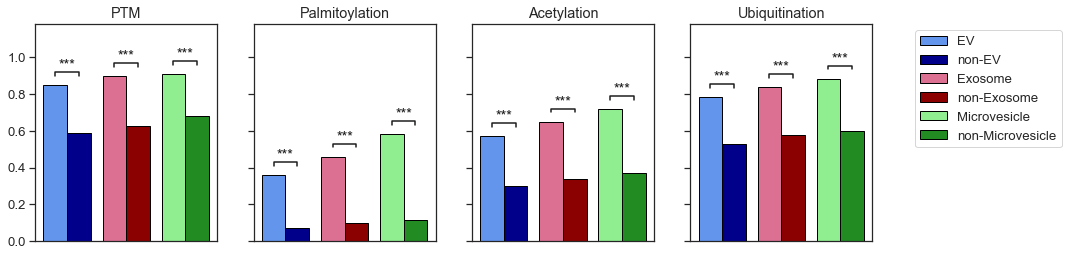

In [34]:
# create subsets of dataframes for PTM types to be plotted
PTMs = ["PTM", "Palmitoylation", "Acetylation", "Ubiquitination"]
subsets = []
for i in PTMs:
    subset = create_subset(i, df_all_PTM_combined, df_exo_PTM_combined, df_mv_PTM_combined)
    subsets.append(subset)

# figure settings
sns.set(style=("ticks"), font_scale=1.2)
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
plt.ylim((0, 1.18))   

x1 = [1, 3, 5]
x2 = [1.8, 3.8, 5.8]

for i, data in enumerate(subsets):
    # create bar plots
    axs[i].bar([1, 1.8, 3, 3.8, 5, 5.8], data["Fraction"], color=["cornflowerblue", "darkblue", "palevioletred", "darkred", 
        "lightgreen", "forestgreen"], edgecolor="black")
    axs[i].set(xlabel=None, ylabel=None, title=PTMs[i], xticks=[])
    y, h = data['Fraction'].iloc[0] + 0.05, 0.02
    axs[i].plot([1, 1, 1.8, 1.8], [y, y+h, y+h, y], lw=1.5, c='k') # data['Fraction'].iloc[1] + 0.05
    axs[i].text((1+1.8)*.5, y+h, "***", ha='center', va='bottom', color='k')
    y, h = data['Fraction'].iloc[2] + 0.05, 0.02
    axs[i].plot([3, 3, 3.8, 3.8], [y, y+h, y+h, y], lw=1.5, c='k')
    axs[i].text((3+3.8)*.5, y+h, "***", ha='center', va='bottom', color='k')
    y, h = data['Fraction'].iloc[4] + 0.05, 0.02
    axs[i].plot([5, 5, 5.8, 5.8], [y, y+h, y+h, y], lw=1.5, c='k')
    axs[i].text((5+5.8)*.5, y+h, "***", ha='center', va='bottom', color='k')   
    # add legend outside of plots
    if i == 3:
        axs[i].legend(handles=axs[i].patches, labels=["EV", "non-EV", "Exosome", "non-Exosome", "Microvesicle", 
            "non-Microvesicle"], bbox_to_anchor=(1.2, 1))

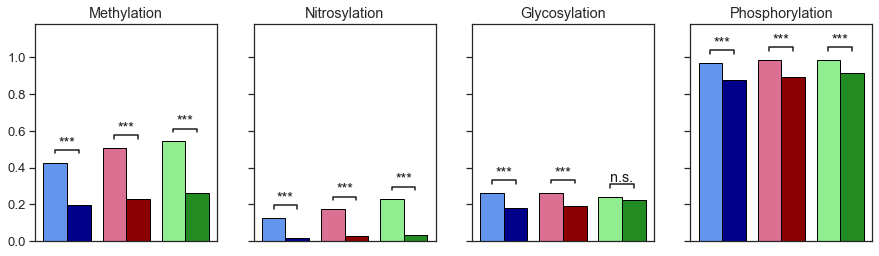

In [35]:
# create subsets of dataframes for PTM types to be plotted
PTMs = ["Methylation", "Nitrosylation", "Glycosylation", "Phosphorylation"]
subsets = []
for i in PTMs:
    subset = create_subset(i, df_all_PTM_combined, df_exo_PTM_combined, df_mv_PTM_combined)
    subsets.append(subset)

# figure settings
sns.set(style=("ticks"), font_scale=1.2)
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(15, 4))
plt.ylim((0, 1.18))   

for i, data in enumerate(subsets):
    # create bar plots
    axs[i].bar([1, 1.8, 3, 3.8, 5, 5.8], data["Fraction"], color=["cornflowerblue", "darkblue", "palevioletred", "darkred", 
        "lightgreen", "forestgreen"], edgecolor="black")
    axs[i].set(xlabel=None, ylabel=None, title=PTMs[i], xticks=[])
    y, h = data['Fraction'].iloc[0] + 0.05, 0.02
    axs[i].plot([1, 1, 1.8, 1.8], [y, y+h, y+h, y], lw=1.5, c='k') # data['Fraction'].iloc[1] + 0.05
    axs[i].text((1+1.8)*.5, y+h, "***", ha='center', va='bottom', color='k')
    y, h = data['Fraction'].iloc[2] + 0.05, 0.02
    axs[i].plot([3, 3, 3.8, 3.8], [y, y+h, y+h, y], lw=1.5, c='k')
    axs[i].text((3+3.8)*.5, y+h, "***", ha='center', va='bottom', color='k')
    y, h = data['Fraction'].iloc[4] + 0.05, 0.02
    axs[i].plot([5, 5, 5.8, 5.8], [y, y+h, y+h, y], lw=1.5, c='k')
#     axs[i].text((5+5.8)*.5, y+h, "***", ha='center', va='bottom', color='k')  
    # add legend outside of plots
    if i == 2:
        axs[i].text((5+5.8)*.5, y+h, "n.s.", ha='center', va='bottom', color='k')
    else:
        axs[i].text((5+5.8)*.5, y+h, "***", ha='center', va='bottom', color='k')